<a href="https://colab.research.google.com/github/mfattibello/ML/blob/master/Desafio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importando as bibliotecas 
import pylab as pl # utilizado para plotar os gráficos
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
from sklearn.neighbors import KNeighborsClassifier #importa o modelo KNN
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação
from sklearn.ensemble import RandomForestClassifier #importa o classificador de Random Forest
from sklearn import svm #importa o classificador SVM
from sklearn.neural_network import MLPClassifier #importa o classificador MLP

In [4]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [0]:
#importando os dados como um dataframe
df = pd.read_csv('winequality-red.csv', sep = ';')

In [9]:
#conhecendo o dataset 
df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [10]:
#informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
#estatísticas do dataset
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [14]:
df['residual sugar'].isnull().sum()

0

In [31]:
#verificação da Correlação Pearson entre variáveis
df[['fixed acidity','pH']].corr(method='pearson') 

fixed acidity        pH
fixed acidity       1.000000 -0.682978
pH                 -0.682978  1.000000

In [32]:
#verificação da Correlação Pearson entre variáveis
df[['quality','alcohol']].corr(method='pearson') 

quality   alcohol
quality  1.000000  0.476166
alcohol  0.476166  1.000000

In [66]:
#Analisar quantidade de instâncias para a Qualidade do Vinho igual a 5
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
#realiza uma cópia do DataFrame para eliminarmos a coluna de saída
ds_entrada = df.copy()
ds_entrada = ds_entrada.drop(['quality'], axis=1)

In [108]:
#confirma alterações efetuadas
ds_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [0]:
#normalização do banco de dados, necessário para que os algoritmos possam ter um comportamento mais "previsível"
scaler = MinMaxScaler(feature_range=(0, 1)) #cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
ds = scaler.fit_transform(ds_entrada) # aplica a escala

In [110]:
print(ds[0,])

[0.24778761 0.39726027 0.         0.06849315 0.10684474 0.14084507
 0.09893993 0.56754772 0.60629921 0.13772455 0.15384615]


In [0]:
#transforma os dados em array
entradas_normalizadas = ds  #dados de entrada
saida = df['quality'].values  #saída ou target

In [0]:
#divide o dataset entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1) #divide 30% para teste

**KNN**

In [121]:
#aplica o Modelo KNN
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#realiza a previsão
y_pred = clf_KNN.predict(X_test)

In [123]:
#constrói a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  1   0   1   0   0   0]
 [  0   1  14   5   1   0]
 [  0   0 148  54   5   0]
 [  0   1  71 102  21   0]
 [  0   1   9  23  19   0]
 [  0   0   0   1   2   0]]
              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.66       207
           6       0.55      0.52      0.54       195
           7       0.40      0.37      0.38        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.36      0.39       480
weighted avg       0.55      0.56      0.55       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Árvore de Decisão**

In [0]:
#aplica o modelo de Árvore de Decisão
clf_arvore = DecisionTreeClassifier(criterion='entropy')

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_arvore.predict(X_test)

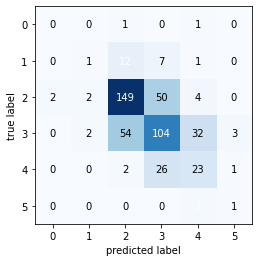

In [181]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [0]:
#visualização da árvore de decisão
#importação das bibliotecas necessárias para realizar a visualização da árvore de decisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [183]:
#Constrói a árvore de decisão para o dataset
dot_data = StringIO()
export_graphviz(clf_arvore, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dataset.png')
Image(graph.create_png())

In [184]:
#verifica a acuracidade do modelo
accuracy = accuracy_score(y_test,y_pred)
print('Acurácia: {}'.format(accuracy))

Acurácia: 0.5791666666666667


**Random Forests**

In [0]:
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

In [0]:
#treina o modelo
clf_floresta.fit(X_train,y_train)

y_pred=clf_floresta.predict(X_test)

In [188]:
#determina a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6791666666666667


**SVM**

In [0]:
clf_svm = svm.SVC(gamma='auto',kernel='rbf')

In [0]:
#treina o modelo
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

In [194]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5854166666666667


**Rede MLP**

In [0]:
clf_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

In [201]:
#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
#realiza a previsão
y_pred=clf_mlp.predict(X_test)

In [203]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


**Sistema Binário (Vinhos Bons e Ruins)**

In [0]:
#cria uma nova coluna e faz um laço iterativo para atribuir valores no DataFrame
df['Flag_Qualidade'] = 0

for index, row in df.iterrows():
    if row['quality'] > 5:
        df.loc[index,'Flag_Qualidade'] = 'Y'
    else:
        df.loc[index,'Flag_Qualidade'] = 'N'


In [212]:
#confere as novas atribuições
df.head(15)

fixed acidity  volatile acidity  ...  quality  Flag_Qualidade
0             7.4             0.700  ...        5               N
1             7.8             0.880  ...        5               N
2             7.8             0.760  ...        5               N
3            11.2             0.280  ...        6               Y
4             7.4             0.700  ...        5               N
5             7.4             0.660  ...        5               N
6             7.9             0.600  ...        5               N
7             7.3             0.650  ...        7               Y
8             7.8             0.580  ...        7               Y
9             7.5             0.500  ...        5               N
10            6.7             0.580  ...        5               N
11            7.5             0.500  ...        5               N
12            5.6             0.615  ...        5               N
13            7.8             0.610  ...        5               N
14            8.9             0.620  ...        5               N

[15 rows x 13 columns]

In [214]:
#realiza uma cópia do DataFrame para eliminarmos as colunas de saídas
ds_entrada_novo = df.copy()
ds_entrada_novo = ds_entrada_novo.drop(['quality', 'Flag_Qualidade'], axis=1)

#confirma alterações efetuadas
ds_entrada.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [0]:

#normalização do banco de dados, necessário para que os algoritmos possam ter um comportamento mais "previsível"
scaler = MinMaxScaler(feature_range=(0, 1)) #cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
ds = scaler.fit_transform(ds_entrada_novo) # aplica a escala

In [0]:
#transforma os dados em array
entradas_normalizadas = ds  #dados de entrada
saida = df['Flag_Qualidade'].values  #saída ou target

In [0]:
#divide o dataset entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1) #divide 30% para teste

In [0]:
#aplica novamente o modelo de Random Forest neste novo dataset
clf_floresta_nova = RandomForestClassifier(max_depth=10, random_state=1)

In [0]:
#treina o modelo
clf_floresta_nova.fit(X_train,y_train)

y_pred=clf_floresta_nova.predict(X_test)

In [220]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8041666666666667


In [223]:
df['residual sugar'].median()

2.2